# 1. The Dataset

In [18]:
#Para manipular el dataset yapo_losrios.csv desde un dataframe de pandas
import pandas as pd
df_yapo = pd.read_csv('dataset_yapo_losrios_clean.csv')

In [25]:
#Para utilizar una sintaxis SQL para consultar un dataframe (para l@s que les gusta SQL :-) )
from pandasql import sqldf

#Ejemplo:
myQuery="""SELECT * FROM df_yapo LIMIT 5;"""
result=sqldf(myQuery)
result

,Link,Titulo,Descripcion,Tipo,Valor,Fecha,Dormitorios,Baños,Comuna
0,https://www.yapo.cl/los_rios/arrendar/cabana_a...,Cabaña amoblada,"Cabaña amoblada, en sector residencial Parque...",Departamento,180000,5 Diciembre 15:32,1.0,1.0,Valdivia
1,https://www.yapo.cl/los_rios/arrendar/casa_par...,casa para arrendar,Tengo subsidio de arriendo el subsidio es de ...,Casa,230000,5 Diciembre 15:09,3.0,1.0,Valdivia
2,https://www.yapo.cl/los_rios/arrendar/cabana_6...,cabaña,Excelentes y confortables cabañas para arrien...,Departamento,320000,5 Diciembre 15:08,2.0,1.0,Valdivia
3,https://www.yapo.cl/los_rios/arrendar/cabana_6...,cabaña,"Arriendo 2 cabañas, cada una cuenta con 2 dor...",Casa,200000,5 Diciembre 14:26,2.0,1.0,Valdivia
4,https://www.yapo.cl/los_rios/arrendar/arriendo...,Arriendo Departamento Estudio,"Arriendo Departamento Estudio, $ 150.000 mens...",Departamento,150000,5 Diciembre 13:45,1.0,1.0,Valdivia


# 2. Oh, show me the way to the next whisky bar (oh, don't ask why)

In [49]:
#¿Cuál es el valor promedio del arriendo según el tipo de bien inmobiliario?

myQuery="""SELECT Tipo, round(avg(Valor),0) as Precio_Promedio 
FROM df_yapo 
WHERE Tipo NOT LIKE 'Terreno' 
GROUP BY Tipo ORDER BY Precio_Promedio;"""

result=sqldf(myQuery)
result

,Tipo,Precio_Promedio
0,Pieza,130943.0
1,Oficina,255366.0
2,Casa,256576.0
3,Departamento,276860.0
4,"Estacionamiento, bodega u otro",305433.0
5,Comercial e industrial,464335.0


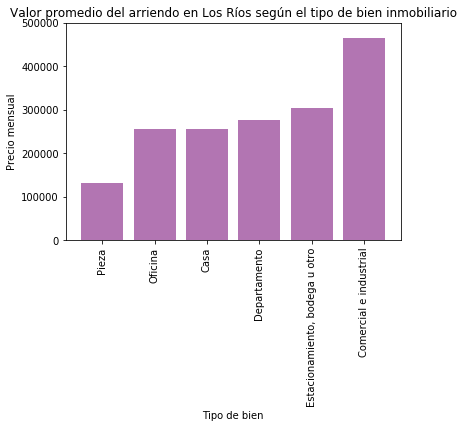

In [55]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Dataset
height = result['Precio_Promedio']
bars = result['Tipo']
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Valor promedio del arriendo en Los Ríos según el tipo de bien inmobiliario')
plt.xlabel('Tipo de bien')
plt.ylabel('Precio mensual')
 
# Limits for the Y axis
plt.ylim(0,500000)
 
# Create names
plt.xticks(y_pos, bars, rotation=90)
 
# Show graphic
#plt.show()

#Save graphic
plt.savefig('plot.png')  

In [72]:
import base64

encoded = base64.b64encode(open("plot.png", "rb").read())
img_base64 = 'data:image/png;base64,' + str(encoded)[2: -1]

In [71]:
import requests
url = 'http://activismo.inf.uach.cl:8080/api/chart/'
myData = {
    "title": "Yapo 1",
    "image": img_base64,
    "tags":["Precio promedio arriendo"]
}
x = requests.post(url, data = myData)
print(x)

<Response [200]>
